# ảnh sau lọc

<>:9: SyntaxWarning: invalid escape sequence '\I'
<>:9: SyntaxWarning: invalid escape sequence '\I'
C:\Users\Home\AppData\Local\Temp\ipykernel_30664\354991006.py:9: SyntaxWarning: invalid escape sequence '\I'
  img = Image.open("C:\ImageProcessing\Doan-xulyanh\img\pumpkin.png").convert("L")


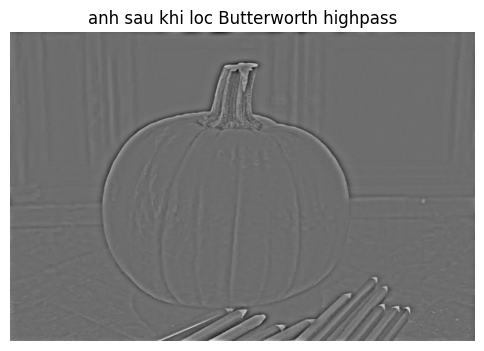

In [2]:
# butterworth_highpass_duahau.py
# loc thong cao Butterworth cho anh duahau.png va chi hien thi anh sau khi loc

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === a doc anh goc (grayscale) ===
img = Image.open("C:\ImageProcessing\Doan-xulyanh\img\pumpkin.png").convert("L")
f = np.array(img, dtype=np.float64)
P, Q = f.shape

# === b tao bo loc thong cao Butterworth ===
D0 = 30       # tan so cat
n = 2         # cap cua bo loc

# tao luoi toa do
u = np.arange(P)
v = np.arange(Q)
U, V = np.meshgrid(u, v, indexing='ij')

# khoang cach D(u,v) den tam
D = np.sqrt((U - P/2)**2 + (V - Q/2)**2)

# ham loc thong cao Butterworth
H = 1 / (1 + (D0 / (D + 1e-5))**(2 * n))  # cong 1e-5 de tranh chia 0

# === c bien doi Fourier anh goc ===
F = np.fft.fft2(f)
F_shift = np.fft.fftshift(F)

# === d nhan pho anh voi bo loc ===
G_shift = F_shift * H

# === e bien doi nguoc Fourier ===
G = np.fft.ifftshift(G_shift)
g = np.fft.ifft2(G)
g_real = np.real(g)

# === f chuan hoa ve 0–255 ===
g_min, g_max = g_real.min(), g_real.max()
g_norm = (g_real - g_min) / (g_max - g_min) * 255
g_uint8 = np.clip(g_norm, 0, 255).astype(np.uint8)

# === g hien thi anh sau khi loc ===
plt.figure(figsize=(6,6))
plt.title("anh sau khi loc Butterworth highpass")
plt.imshow(g_uint8, cmap='gray')
plt.axis('off')
plt.show()
